# Fake news detection using ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [4]:
letter=['w','w','a','t','k','a','p']
print(len(list(set(letter))))

5


In [3]:
fake.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
23476,False,False,False,False
23477,False,False,False,False
23478,False,False,False,False
23479,False,False,False,False


In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

# Data cleaning and preparation

In [6]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [7]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [8]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [9]:
# Check the data
data.head()

,title,text,subject,date,target
0,U Of WI STUDENTS SELL Hateful Hoodies: “All Wh...,"University of Wisconsin Madison, where NOT to ...",left-news,"Oct 6, 2016",fake
1,Samantha Bee Slams ‘Moderate’ John Kasich’s D...,Full Frontal host Samantha Bee is not known fo...,News,"February 23, 2016",fake
2,DOZENS Of GOP Foreign Policy Experts Pledge T...,Over sixty GOP national security buffs have ta...,News,"March 3, 2016",fake
3,"On Shanghai outskirts, some residents unmoved ...","FENGXIAN, China (Reuters) - Chinese President ...",worldnews,"October 25, 2017",true
4,Hillary Said We ‘Owe Donald Trump The Chance ...,"Sometimes, it sucks to take the high road. Wh...",News,"November 9, 2016",fake


In [10]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,U Of WI STUDENTS SELL Hateful Hoodies: “All Wh...,"University of Wisconsin Madison, where NOT to ...",left-news,fake
1,Samantha Bee Slams ‘Moderate’ John Kasich’s D...,Full Frontal host Samantha Bee is not known fo...,News,fake
2,DOZENS Of GOP Foreign Policy Experts Pledge T...,Over sixty GOP national security buffs have ta...,News,fake
3,"On Shanghai outskirts, some residents unmoved ...","FENGXIAN, China (Reuters) - Chinese President ...",worldnews,true
4,Hillary Said We ‘Owe Donald Trump The Chance ...,"Sometimes, it sucks to take the high road. Wh...",News,fake


In [11]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"University of Wisconsin Madison, where NOT to ...",left-news,fake
1,Full Frontal host Samantha Bee is not known fo...,News,fake
2,Over sixty GOP national security buffs have ta...,News,fake
3,"FENGXIAN, China (Reuters) - Chinese President ...",worldnews,true
4,"Sometimes, it sucks to take the high road. Wh...",News,fake


In [12]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"university of wisconsin madison, where not to ...",left-news,fake
1,full frontal host samantha bee is not known fo...,News,fake
2,over sixty gop national security buffs have ta...,News,fake
3,"fengxian, china (reuters) - chinese president ...",worldnews,true
4,"sometimes, it sucks to take the high road. wh...",News,fake


In [13]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [14]:
# Check
data.head()

,text,subject,target
0,university of wisconsin madison where not to s...,left-news,fake
1,full frontal host samantha bee is not known fo...,News,fake
2,over sixty gop national security buffs have ta...,News,fake
3,fengxian china reuters chinese president xi j...,worldnews,true
4,sometimes it sucks to take the high road when...,News,fake


In [15]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data.head()

,text,subject,target
0,university wisconsin madison send kids school ...,left-news,fake
1,full frontal host samantha bee known mincing w...,News,fake
2,sixty gop national security buffs taken pledge...,News,fake
3,fengxian china reuters chinese president xi ji...,worldnews,true
4,sometimes sucks take high road go low go high ...,News,fake


# Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


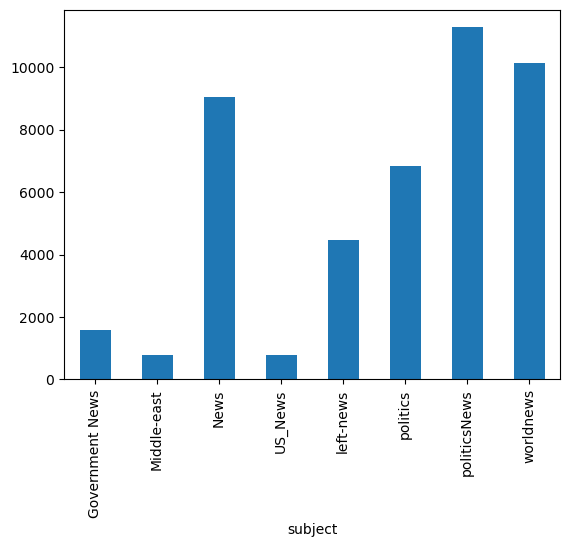

In [17]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


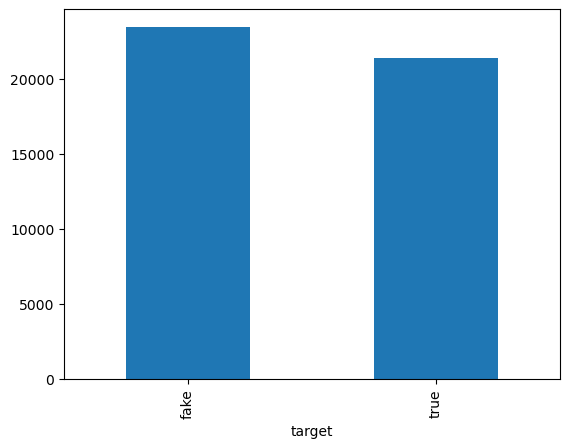

In [18]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

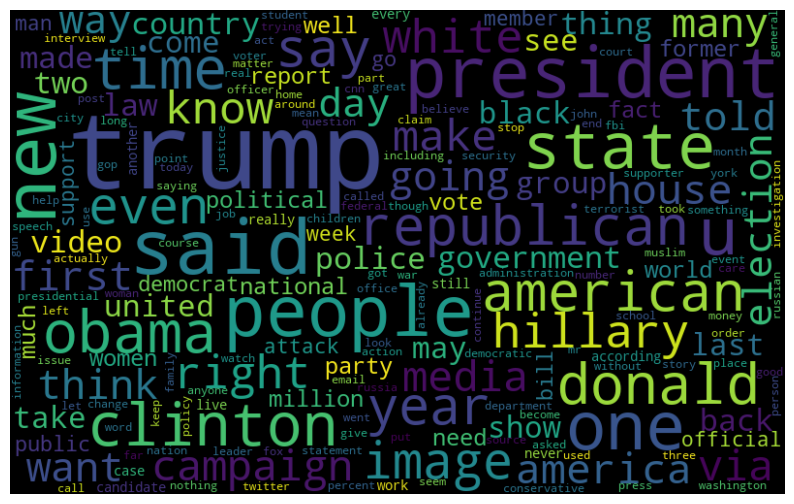

In [19]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

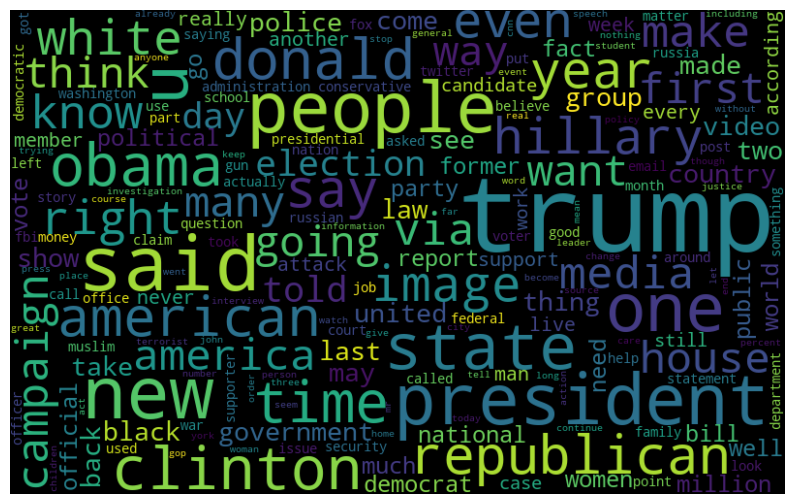

In [20]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

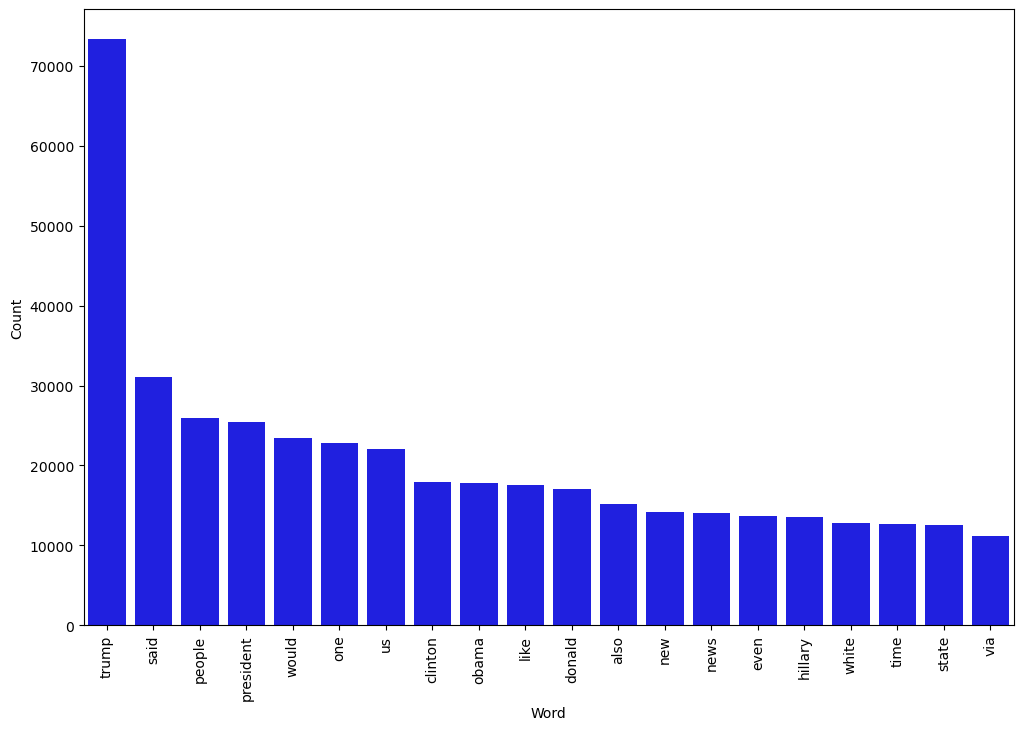

In [22]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

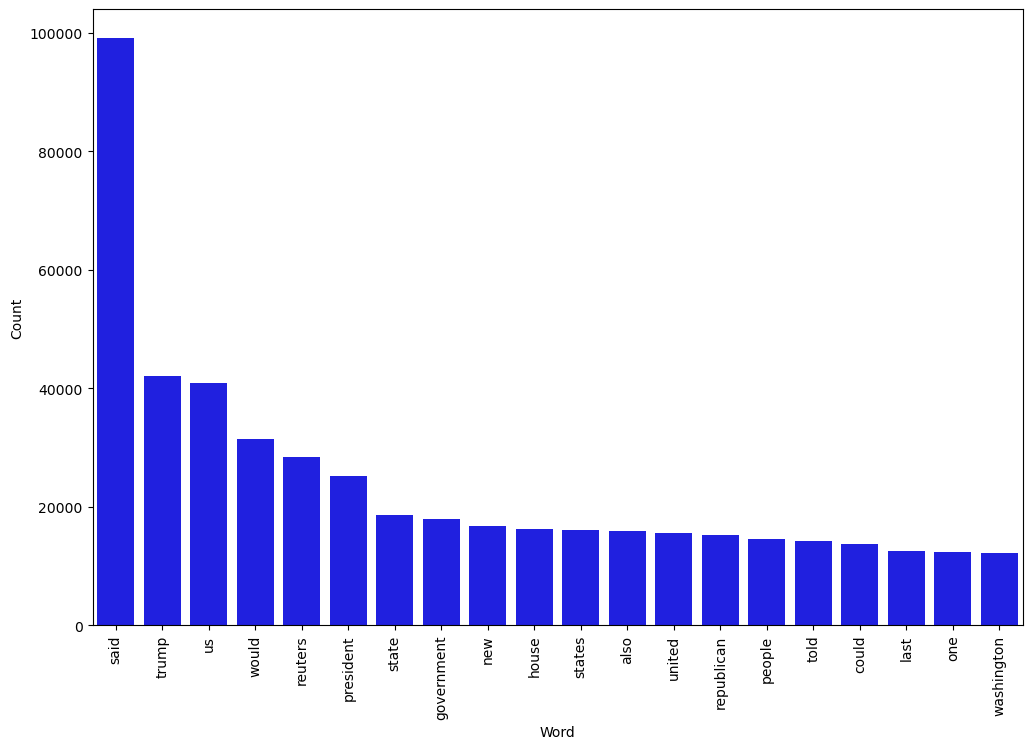

In [23]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [24]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm):
    plt.figure(figsize = (5,4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

# Peparing the data

In [25]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# Naive Bayes

In [26]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.6%


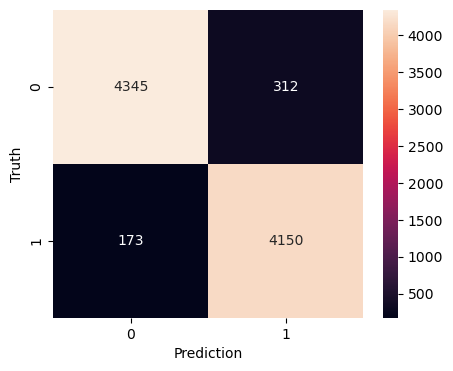

In [27]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm)

# Logistic regression

In [28]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.83%


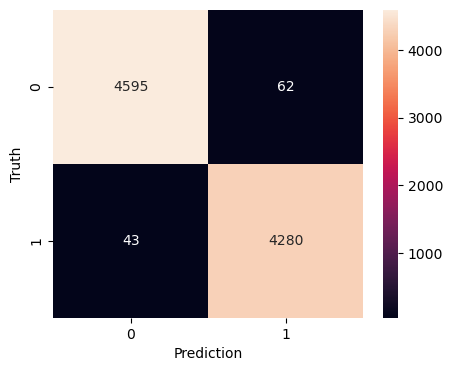

In [29]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.5%


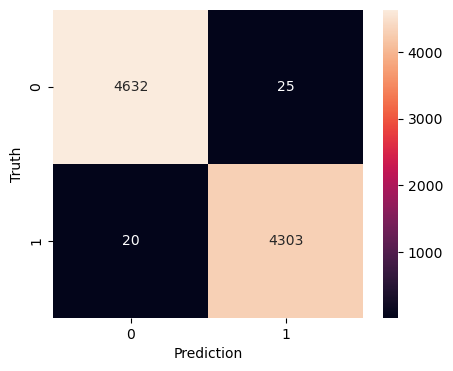

In [31]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm)

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.81%


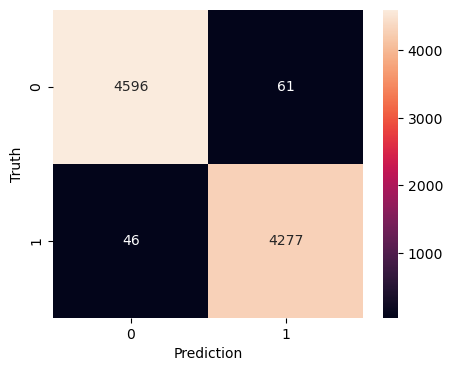

In [33]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm)

# SVM

In [34]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.43%


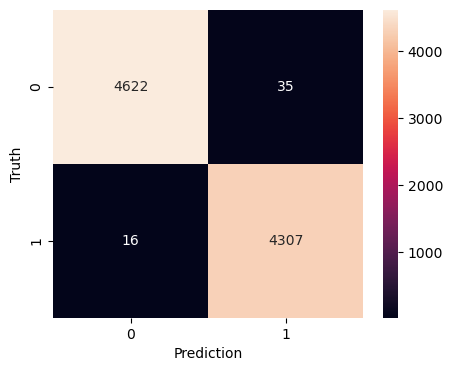

In [35]:
cm = confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm)

# Comparing Different Models

([<matplotlib.axis.YTick at 0x1f4da185fd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

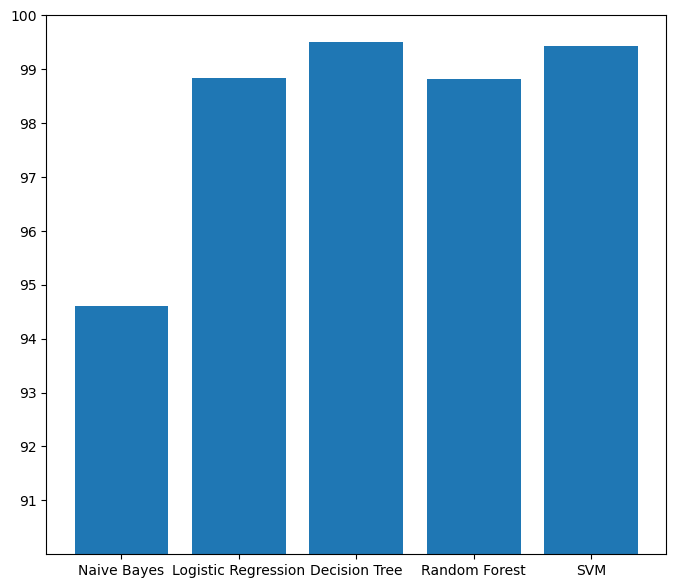

In [36]:
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))